<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.


__Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])



__Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

# Activity: Movement with uniform acceleration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import interpolate

In [ ]:
# si quisieramos definir un polinomio que dependiera de t este tendria 3 dimensiones x(t)= [d*t**2,b*t**1,c*t**0] el cual podemos representar simplemente  como una matriz [d,b,c] 
  
def x(x0,v0,a,t0):
  d= 1/2*a
  b= v0-(a*t0)
  c= x0-(v0*t0)+(1/2*a*t0**2)
  return [d,b,c]

In [ ]:
#para carro 1
x1=x(0,0,6,0)
x1
#para carro 2
x2=x(0,10,10,10)
print(x1)
x2

[3.0, 0, 0.0]


[5.0, -90, 400.0]

In [ ]:
#Teniendo los dos vectores empelamos el metodo poly1d para encontrar las raices
x1 = np.poly1d([3, 0, 0])  
x2 = np.poly1d([5, -90, 400])

#Para encontrar el tiempo de encuentro igualamos x1=x2 
tf= np.roots(x1-x2)
print(tf[0]) #debido a que tiene dos raices pero se toma la correspondiente a los postivos

#Para ecnocntrar la distancia a la que se encuentran calculamos con cualquiera de los dos vectores el valor de x(tf)
xf= x1(tf[0])
print(xf)
xf= x2(tf[0])
xf

40.0
4800.0


4800.0

# Activity: For the function  f(x)=tan(x)  between  −π4  and  π4  using  N=10  points (9 intervals). Plot both, the interpolation and the original function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate



In [ ]:
# Definamos la funcion
def f(x):
    return np.tan(x)
N = 10 #numero de puntos que se van a tomar para realizar la interpolacion
x = np.linspace(-np.pi/4, np.pi/4, N) #genera 10 puntos en el rango deseado
print(x)
#evaluamos l funcion en los puntos
y = f(x)
print(y)
# Aplicamos interpolacion 1d, la funcion tangente en el rango definido se comporta como una funcion cubica
f_interp = interpolate.interp1d(x, y, kind='cubic')


[-0.78539816 -0.61086524 -0.43633231 -0.26179939 -0.08726646  0.08726646
  0.26179939  0.43633231  0.61086524  0.78539816]
[-1.         -0.70020754 -0.46630766 -0.26794919 -0.08748866  0.08748866
  0.26794919  0.46630766  0.70020754  1.        ]


In [ ]:
#imprimamos ambas funciones para ver como se comporta la interpolacion 
plt.plot(x, f(x), label='Original function')
plt.plot(x, y, label='Interpolating function')
plt.legend()
plt.show()

# Activity: Apply lagrange interpolations with the following points, work with pandas data frame


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import lagrange

# Define the given points
x = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])

# Create a Pandas dataframe to display the points
df = pd.DataFrame({'x': x, 'f(x)': fx})

# Compute the Lagrange polynomial function
lagrange_poly = lagrange(x, fx)

# Interpolate at all x values and add as a new column
df['x_interpolate'] = lagrange_poly(x)

# Display the dataframe with the interpolated values

df


,x,f(x),x_interpolate
0,1.0,0.765198,0.765198
1,1.3,0.620086,0.620086
2,1.6,0.455402,0.455402
3,1.9,0.281819,0.281819
4,2.2,0.110362,0.110362


In [ ]:
#veamos graficamente como se comportaria la interpolacion

x_= np.linspace(1,2.2,1000)
x_interpolate=lagrange_poly(x_)


In [ ]:
plt.plot(x_,x_interpolate)
plt.plot(x,fx)
plt.legend()
plt.show()


# Activity: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import interpolate

<IPython.core.display.Javascript object>


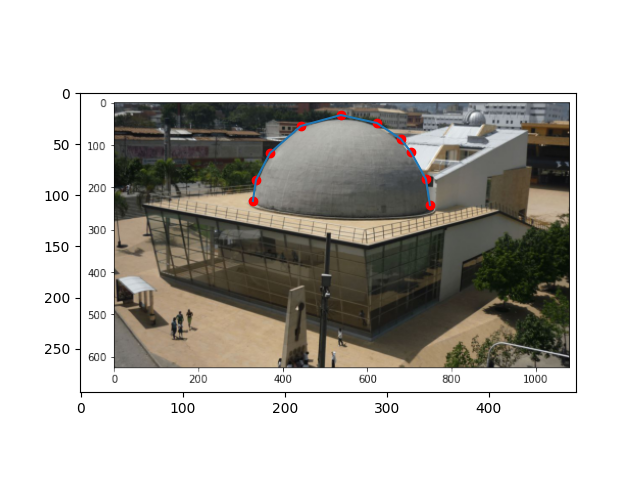

In [ ]:
im= plt.imread("planetario (2).png")
x=np.array([168.9,171.9,185.6,216.0,255.1,290.4,313.9,323.7,338.4,342.4])
y=np.array([105.4,84.9,58.4,31.9,21.2,29.0,44.7,57.4,83.9,109.4])
plt.plot(x,y,'ro')
f=interpolate.CubicSpline(x,y)
plt.plot(x,f(x))
plt.imshow(im)

In [ ]:
from scipy.interpolate import lagrange
poly = lagrange(x, y)
print(poly)
x_=np.linspace(np.min(x),np.max(x),100)

           9            8             7             6            5
2.442e-15 x - 5.41e-12 x + 5.269e-09 x - 2.957e-06 x + 0.001054 x
           4         3        2
 - 0.2469 x + 38.02 x - 3705 x + 2.07e+05 x - 5.046e+06


<IPython.core.display.Javascript object>


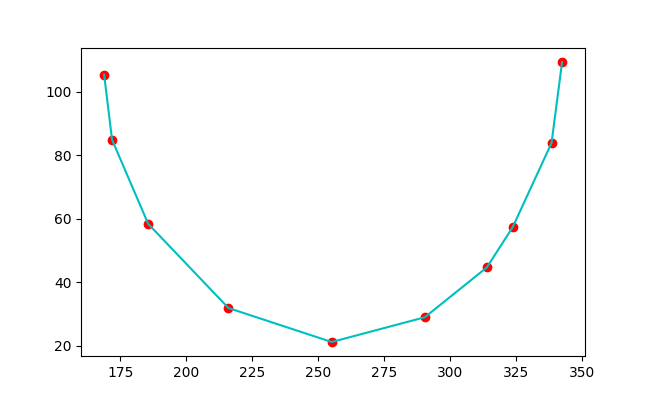

In [ ]:
fig , ax = plt.subplots(figsize=(6.5,4))
ax.plot(x,y,"ro")
ax.plot(x,poly(x),"c")
plt.show()

